# Exercises of the tenth week

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

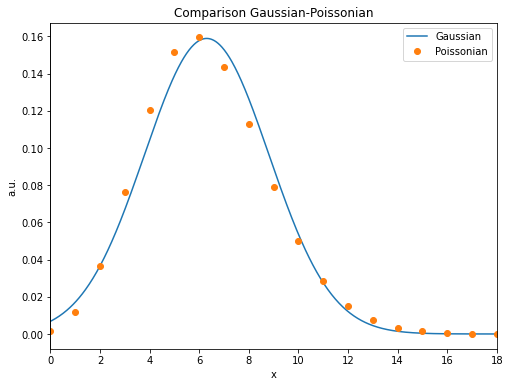

The poisson distribution having mean = 6.3 is approximately gaussian distributed, therefore we can run a Z-test.
The Z score is equal to 3.466, which is larger than 3, therefore the number of hurricanes is significantly different.


In [2]:
def poi(k):    # calculates probability for less or equal than k events
    prob = 0
    avg = 6.3
    for i in range(k):
        probk = ((avg**i)*(np.exp(-avg)))/(np.math.factorial(i))
        prob += probk
    return prob

def zeta(val, mean, sigma):    # Z-test
    Z = abs(val - mean) / sigma
    return Z

# Poissonian and gaussian for the plot; the poisson distribution is discrete so it needs a different array for x
xgauss = np.linspace(6.3 - 5*np.sqrt(6.3) , 6.3 + 5*np.sqrt(6.3), 1000)
gauss = sp.stats.norm.pdf(xgauss, loc=6.3, scale=np.sqrt(6.3))
xpoisson = np.linspace(0,18,19)
poisson = sp.stats.poisson.pmf(xpoisson, mu=6.3)

# Plot to compare poissonian and gaussian
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(xgauss, gauss) 
ax.plot(xpoisson, poisson, marker="o", linestyle="None")
ax.set_title("Comparison Gaussian-Poissonian")
ax.set_xlabel("x")
ax.set_ylabel("a.u.")
ax.axvline(x=0, color="k", linewidth=0.8)
ax.legend(["Gaussian", "Poissonian"])
ax.set_xlim(np.min(xpoisson), np.max(xpoisson))
plt.show()

# Probability of observing more than 15 hurricanes in an year
prob15more = 1-poi(15)

# Output
print("The poisson distribution having mean = 6.3 is approximately gaussian distributed, therefore we can run a Z-test.")
Z = zeta(15, 6.3, np.sqrt(6.3))    # Z-test

print("The Z score is equal to " + str(np.around(Z, 3)) + ", which is larger than 3, therefore the number of hurricanes is significantly different.")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Student's T = -3.786997938137629
The test statistics is two-sided, therefore the p-value is two-sided as well.


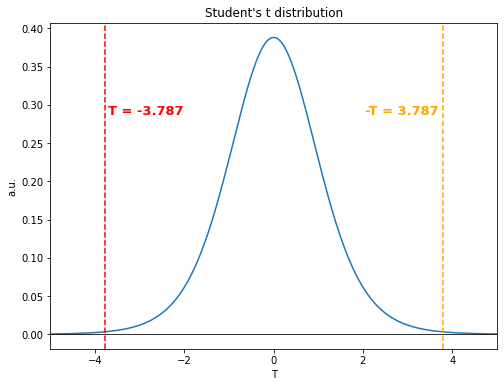

p-value = 0.004302464132864604
The p-value is smaller than the significance level (0.05), therefore we reject the null hypothesis, meaning the change in blood pressure in the sample is significant.


In [3]:
# Samples
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# Characteristics of the samples like mean, T-student
n = len(pre)
premean = np.mean(pre)
postmean = np.mean(post)
presigma = np.sqrt(np.var(pre, ddof=1))
postsigma = np.sqrt(np.var(post, ddof=1))
tsigma = np.sqrt(((presigma**2)+(postsigma**2))/2)
tstud = (premean-postmean)/(tsigma*np.sqrt(2/n))

print("Student's T = " + str(tstud))
print("The test statistics is two-sided, therefore the p-value is two-sided as well.")

# Plot the T-student distribution, with the value of the obtained t-student (and the opposite)
xst = np.linspace(-5, +5, 1000)
tst = sp.stats.t.pdf(xst, n-1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(xst, tst)
ax.axvline(tstud, linestyle="--", color="r")
ax.axvline(-tstud, linestyle="--", color="orange")
ax.axhline(0, linewidth=0.8, color="k")
ax.set_title("Student's t distribution")
ax.set_xlabel("T")
ax.set_ylabel("a.u.")
ax.set_xlim(np.min(xst), np.max(xst))

ax.text(-3.7, 0.3, "T = -3.787", size=13, ha="left", va="top", weight="bold", color="r")
ax.text(3.7, 0.3, "-T = 3.787", size=13, ha="right", va="top", weight="bold", color="orange")

plt.show()

# Calculating p-value summing the two tail contributions
pv = sp.stats.t.cdf(tstud, n-1) + (1. - sp.stats.t.cdf(-tstud, n-1))
print("p-value =", pv)
print("The p-value is smaller than the significance level (0.05), therefore we reject the null hypothesis, meaning the change in blood pressure in the sample is significant.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Tmax fit function parameters:
 [ 27.94963534 -10.58169954   0.59227424  -0.84013367]
Tmax covariance matrix:
 [[ 0.1833971  -0.00655279  0.00640272 -0.04203833]
 [-0.00655279  0.1681644   0.00085885 -0.00522752]
 [ 0.00640272  0.00085885  0.00044872 -0.00296267]
 [-0.04203833 -0.00522752 -0.00296267  0.02135828]]
a = 27.95 +- 0.43
b = -10.58 +- 0.41
c = 0.59 +- 0.02
d = -0.84 +- 0.15

Tmin fit function parameters:
 [-36.71255965 -25.14961943   0.6013211   -1.14762731]
Tmin covariance matrix:
 [[ 1.41858429e+00 -1.89201973e-01  1.59999606e-02 -1.04186062e-01]
 [-1.89201973e-01  1.72807185e+00  2.47923552e-04  3.66628264e-03]
 [ 1.59999606e-02  2.47923552e-04  5.30710620e-04 -3.55959334e-03]
 [-1.04186062e-01  3.66628264e-03 -3.55959334e-03  2.70516826e-02]]
a = -36.71 +- 1.19
b = -25.15 +- 1.31
c = 0.60 +- 0.02
d = -1.15 +- 0.16


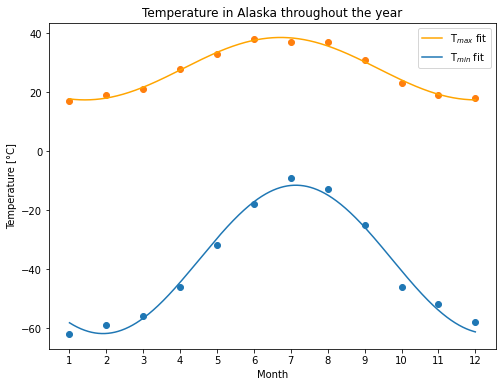

In [4]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Defining generic sinusoidal function
def sinusoidal(x, a, b, c, d):
    return a+b*np.cos(c*x+d)

# Putting data in array
month = np.arange(1,13)
Tmax = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
Tmin = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Plot the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(month, Tmin, month, Tmax, marker="o", linestyle="None")

# Fit T max with sinusoidal
popth, pcovh = sp.optimize.curve_fit(sinusoidal, month, Tmax, p0=[30, -10, 0.5, -1], full_output=False)
print("Tmax fit function parameters:\n", popth)
print("Tmax covariance matrix:\n", pcovh)
print("a = %.2f +- %.2f" % (popth[0], np.sqrt(pcovh[0,0])))
print("b = %.2f +- %.2f" % (popth[1], np.sqrt(pcovh[1,1])))
print("c = %.2f +- %.2f" % (popth[2], np.sqrt(pcovh[2,2])))
print("d = %.2f +- %.2f" % (popth[3], np.sqrt(pcovh[3,3])))

# Fit T min
poptc, pcovc = sp.optimize.curve_fit(sinusoidal, month, Tmin, p0=[-35, -25, 0.5, -1], full_output=False)
print("\nTmin fit function parameters:\n", poptc)
print("Tmin covariance matrix:\n", pcovc)
print("a = %.2f +- %.2f" % (poptc[0], np.sqrt(pcovc[0,0])))
print("b = %.2f +- %.2f" % (poptc[1], np.sqrt(pcovc[1,1])))
print("c = %.2f +- %.2f" % (poptc[2], np.sqrt(pcovc[2,2])))
print("d = %.2f +- %.2f" % (poptc[3], np.sqrt(pcovc[3,3])))

# Print sinusoidal functions with the obtained parameters 
xf = np.linspace(1, 12, 1101)
ax.plot(xf, sinusoidal(xf, popth[0], popth[1], popth[2], popth[3]), color="orange", label="T$_{max}$ fit")
ax.plot(xf, sinusoidal(xf, poptc[0], poptc[1], poptc[2], poptc[3]), color="tab:blue", label="T$_{min}$ fit")
ax.set_title("Temperature in Alaska throughout the year")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature [°C]")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.legend()
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Trying to fit with an exponential function the data; omitting the last bin for the fit since it is off the trend and it worsens the fit.

Fit function parameters:
 [1.41043024 8.57136426 0.08558761 0.05269672]
Covariance matrix:
 [[ 3.40615732e-02  7.14092429e+03  6.51776656e-04 -8.32996005e+02]
 [ 7.14088800e+03  5.89105473e+11 -7.67872620e+01 -6.87194767e+10]
 [ 6.51776671e-04 -7.67864623e+01  1.73596531e-05  8.95712799e+00]
 [-8.32991772e+02 -6.87194767e+10  8.95722198e+00  8.01616467e+09]]
a = 1.41 +- 0.18
b = 8.57 +- 767532.07
c = 0.09 +- 0.00
d = 0.05 +- 89533.04

chi2 = 9.397673575246673
p-value = 0.0244, therefore the fit is not good enough since it's smaller than 0.05.


<ipython-input-5-3780994c8894>:20: RuntimeWarning: overflow encountered in exp
  return a+(b*(np.exp((c*x)+d)))


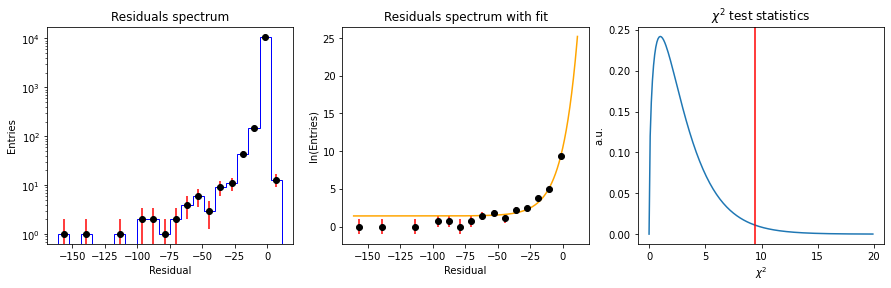

In [5]:
import pickle

#import data into dataframe
filename = "../07ex/data7/residuals_261.pkl"
infile = open(filename, "rb")
tdict = pickle.load(infile).item()
infile.close()
df = pd.DataFrame(tdict)

# plot the data 
fig, (ax, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
entries, edges, _ = ax.hist(df["residuals"], bins=20, histtype="step", color="b")
ax.set_yscale("log")
ax.set_xlabel("Residual")
ax.set_ylabel("Entries")
ax.set_title("Residuals spectrum")

# define a function to fit the data
def exponential(x, a, b, c, d):
    return a+(b*(np.exp((c*x)+d)))

# define the points that will be used in the fit 
binctr = np.array((edges[1:]+edges[:-1])/2)
erry = np.sqrt(entries)
ax.errorbar(binctr, entries, yerr=erry, fmt="ko", ecolor="r")

# Omitting last bin and those bin which have 0 entries to avoid np.log(0)
print("Trying to fit with an exponential function the data; omitting the last bin for the fit since it is off the trend and it worsens the fit.\n")
entriessel = entries[entries!=0][:-1]
binctrsel = binctr[entries!=0][:-1]
errysel = erry[entries!=0][:-1]

# re-plotting the data without the last bin and applying a logarithm
ax2.errorbar(binctrsel, np.log(entriessel), yerr=errysel/entriessel, fmt="ko", ecolor="r")
ax2.set_xlabel("Residual")
ax2.set_ylabel("ln(Entries)")
ax2.set_title("Residuals spectrum with fit")
#ax2.set_yscale("log")

# fit
popt, pcov = sp.optimize.curve_fit(exponential, binctrsel, np.log(entriessel), sigma=errysel/entriessel, absolute_sigma=True, p0=[0, 10, 1, 0], full_output=False)
print("Fit function parameters:\n", popt)
print("Covariance matrix:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("d = %.2f +- %.2f\n" % (popt[3], np.sqrt(pcov[3,3])))

# plot the fitted function
xf = np.linspace(edges[0], edges[-1], 1000)
ax2.plot(xf, exponential(xf, popt[0], popt[1], popt[2], popt[3]), color="orange", label="Fit function")

# calculate chi^2
chi2 = np.sum((np.log(entriessel) - exponential(binctrsel, popt[0], popt[1], popt[2], popt[3]))**2 / errysel)
print("chi2 =", chi2)

# plot the chi^2
p = np.arange(0, 20, 0.1)
ts = sp.stats.chi2.pdf(p, df=3)
ax3.plot(p, ts)
ax3.set_xlabel("$\chi^2$")
ax3.set_ylabel("a.u.")
ax3.set_title("$\chi^2$ test statistics")
ax3.axvline(chi2, color='red')

# calculate p-value
pval = 1-sp.stats.chi2.cdf(chi2, 3)
print("p-value = %.4f, therefore the fit is not good enough since it's smaller than 0.05." % pval)

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

f(x) fit function (entire dataset) parameters:
 a = -9.67 +- 0.18
 b = -0.22 +- 0.02
 c = 9.05 +- 0.12

f(x) fit function (2008-2011) parameters:
 a = -9.99 +- 0.18
 b = -0.23 +- 0.02
 c = 9.38 +- 0.13

The average temperature in Munich throughout the year is given by the offset (c parameter): 9.38°C
The average daily temperature in Munich during the hottest and coldest time of the year are given by the maximum and the minimum of the fitting function: 19.37°C and -0.60°C

The b parameter would be a translation in the time axis (b<0 is a translation to the right); physically it would represent the time offset (in years) between the 1st January of each year and the coldest day in the year according to the model.

g(x) fit function parameters:
 a = -9.67 +- 0.18
 b = 1.00 +- 0.00
 c = 3.06 +- 6.95
 d = 9.05 +- 0.12

RSS:
 f(x) = 694209.832625
 g(x) = 694186.252359
After running a Fischer's F test, the obtained p-value is equal to 0.63, which is much larger than 0.05. Therefore the null hy

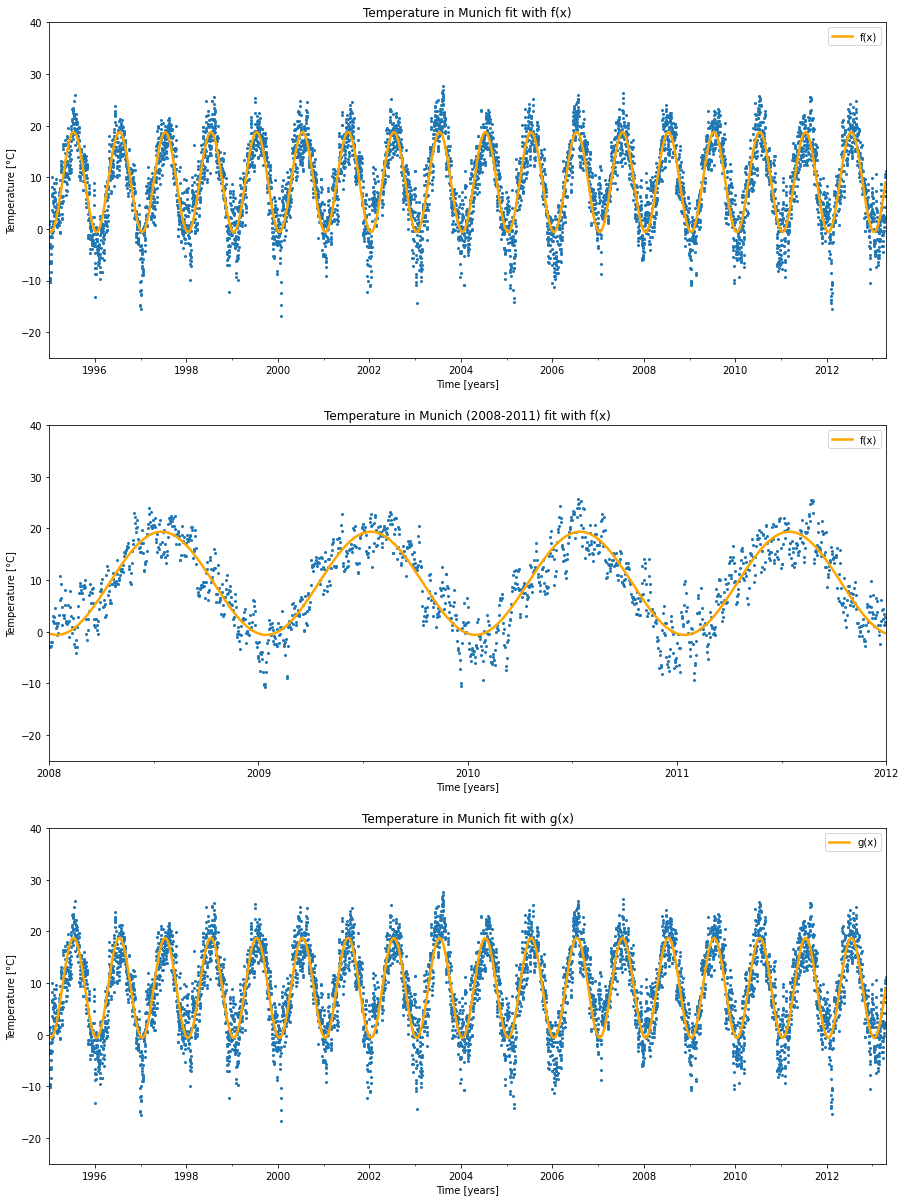

In [6]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
infile = "data10/munich_temperatures_average_with_bad_data.txt"

# read the file and put the data in lists
timel, templ = [], []
with open(infile, mode = "r") as f:
    for line in f:
        ll = line.split(" ")
        timel.append(float(ll[0]))
        templ.append(float(ll[1]))
    f.close()

# Lists into arrays
time = np.array(timel)
temp = np.array(templ)
# There was no explicit request to remove the bad data (T=±99°C) so I kept everything

# Define the 2 functions I will need
def fitfunction(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c
def gitgunction(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t + c) + d

# Plot the data in ax1, ax3
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15,21))
ax1.plot(time, temp, marker="o", markersize="2", linestyle="none")
ax1.set_xlim(1995, 2013.3)
ax1.set_ylim(-25,40)
ax1.set_xlabel("Time [years]")
ax1.set_ylabel("Temperature [°C]")
ax1.set_title("Temperature in Munich fit with f(x)")
ax3.plot(time, temp, marker="o", markersize="2", linestyle="none")
ax3.set_xlim(1995, 2013.3)
ax3.set_ylim(-25,40)
ax3.set_xlabel("Time [years]")
ax3.set_ylabel("Temperature [°C]")
ax3.set_title("Temperature in Munich fit with g(x)")

ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.xaxis.set_major_locator(MultipleLocator(2))
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))

# fit the data with fitfunction (f(x)) and plot into ax1
poptf, pcovf = sp.optimize.curve_fit(fitfunction, time, temp, p0=[-15, 0, 15])
print("f(x) fit function (entire dataset) parameters:")
print(" a = %.2f +- %.2f" % (poptf[0], np.sqrt(pcovf[0,0])))
print(" b = %.2f +- %.2f" % (poptf[1], np.sqrt(pcovf[1,1])))
print(" c = %.2f +- %.2f" % (poptf[2], np.sqrt(pcovf[2,2])))
ax1.plot(time, fitfunction(time, poptf[0], poptf[1], poptf[2]), color="orange", linewidth="2.5", label="f(x)")
ax1.legend()

# fit the 2008-2012 interval with f(x), plotting the interval in ax2
# Not clear if 2012 should be included; interpreted as range(2008,2012) so excluded
timesel = time[np.logical_and(time>2008, time<2012)]
tempsel = temp[np.logical_and(time>2008, time<2012)]
ax2.plot(timesel, tempsel, marker="o", markersize="2", linestyle="none")
modelf = fitfunction(time, poptf[0], poptf[1], poptf[2])
ax2.set_xlim(2008, 2012)
ax2.set_ylim(-25,40)
ax2.set_xlabel("Time [years]")
ax2.set_ylabel("Temperature [°C]")
ax2.set_title("Temperature in Munich (2008-2011) fit with f(x)")
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))

poptfs, pcovfs = sp.optimize.curve_fit(fitfunction, timesel, tempsel, p0=[-15, 0, 15])
print("\nf(x) fit function (2008-2011) parameters:")
print(" a = %.2f +- %.2f" % (poptfs[0], np.sqrt(pcovfs[0,0])))
print(" b = %.2f +- %.2f" % (poptfs[1], np.sqrt(pcovfs[1,1])))
print(" c = %.2f +- %.2f" % (poptfs[2], np.sqrt(pcovfs[2,2])))
model = fitfunction(timesel, poptfs[0], poptfs[1], poptfs[2])
ax2.plot(timesel, model, color="orange", linewidth="2.5", label="f(x)")
ax2.legend()

print("\nThe average temperature in Munich throughout the year is given by the offset (c parameter): %.2f°C" % poptfs[2])
print("The average daily temperature in Munich during the hottest and coldest time of the year are given by the maximum and the minimum of the fitting function: %.2f°C and %.2f°C" % (np.max(model), np.min(model)))
print("\nThe b parameter would be a translation in the time axis (b<0 is a translation to the right); physically it would represent the time offset (in years) between the 1st January of each year and the coldest day in the year according to the model.")

# fit the data with gitgunction (g(x)) and plotting in ax3
# Unclear if all data or the selected time period, considering entire dataset
poptg, pcovg = sp.optimize.curve_fit(gitgunction, time, temp, p0=[-15, 1, 0, 15])
print("\ng(x) fit function parameters:")
print(" a = %.2f +- %.2f" % (poptg[0], np.sqrt(pcovg[0,0])))
print(" b = %.2f +- %.2f" % (poptg[1], np.sqrt(pcovg[1,1])))
print(" c = %.2f +- %.2f" % (poptg[2], np.sqrt(pcovg[2,2])))
print(" d = %.2f +- %.2f" % (poptg[3], np.sqrt(pcovg[3,3])))
modelg = gitgunction(time, poptg[0], poptg[1], poptg[2], poptg[3])
ax3.plot(time, gitgunction(time, poptg[0], poptg[1], poptg[2], poptg[3]), color="orange", linewidth="2.5", label="g(x)")
ax3.legend()

# Calculating the residuals sum squared for the f and g fit
RSSf = np.sum(np.square(modelf-temp))
RSSg = np.sum(np.square(modelg-temp))
print("\nRSS:\n f(x) = %.6f\n g(x) = %.6f" % (RSSf, RSSg))

# Calculate the Fisher F to perform the F-test
F = ((RSSf-RSSg)/(3-2))/(RSSg/(len(time)-3))
pval = 1-sp.stats.f.cdf(F, 3-2, len(time)-3)    # p-value

print("After running a Fischer's F test, the obtained p-value is equal to %.2f, which is much larger than 0.05. Therefore the null hypothesis cannot be rejected, which means that the additional parameter is not necessary and f(x) is sufficient to fit the data." % pval)